<a href="https://colab.research.google.com/github/yukinaga/minnano_ai/blob/master/section_7/cpu_gpu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CPUとGPU
実際にディープラーニングを行い、CPUとGPUのパフォーマンスを比較します。

## ●CIFAR-10
CIFARは、6万枚の画像にそれに写っているものが何なのかを表すラベルをつけたデータセットです。  
今回は、こちらのデータセットを使ってニューラルネットワークを訓練します。  
以下のコードでは、CIFAR-10を読み込み、ランダムな25枚の画像を表示します。

170508288/170498071 [==============================] - 4s 0us/step
Image size: (32, 32, 3)


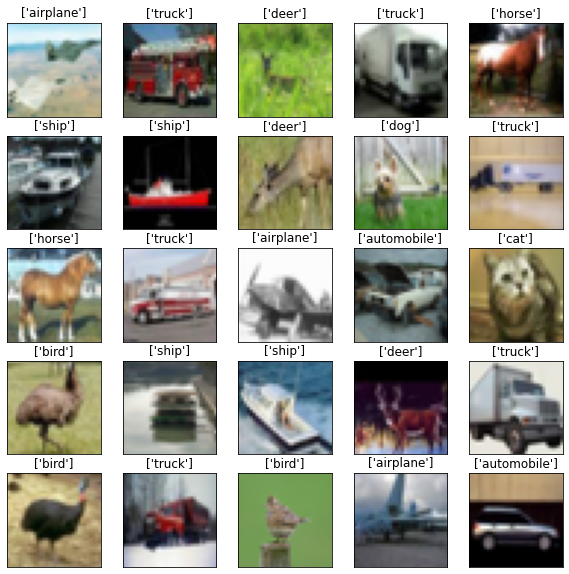

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10

(x_train, t_train), (x_test, t_test) = cifar10.load_data()
print("Image size:", x_train[0].shape)

cifar10_labels = np.array(["airplane", "automobile", "bird", "cat", "deer",
                           "dog", "frog", "horse", "ship", "truck"])

n_image = 25
rand_idx = np.random.randint(0, len(x_train), n_image)

plt.figure(figsize=(10,10))  # 画像の表示サイズ
for i in range(n_image):
    cifar_img=plt.subplot(5,5,i+1)
    plt.imshow(x_train[rand_idx[i]])
    label = cifar10_labels[t_train[rand_idx[i]]]
    plt.title(label)
    plt.tick_params(labelbottom=False, labelleft=False, bottom=False, left=False)  # ラベルとメモリを非表示に

plt.show()

## ●パフォーマンス比較
以下はフレームワークKerasを使って実装した、典型的な畳み込みニューラルネットワークのコードです。  
ニューラルネットワークが5万枚の画像を学習します。  
CPUとGPUで、学習に要する時間を比較しましょう。  
デフォルトではCPUが使用されますが、編集→ノートブックの設定のハードウェアアクセラレーターでGPUを選択することでGPUが使用されるようになります。  
実行時間は、実行結果が表示される領域の左のアイコンにカーソルを合わせると確認することができます。

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

#!pip list

'/device:GPU:0'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam

(x_train, t_train), (x_test, t_test) = cifar10.load_data()

batch_size = 32
epochs = 1
n_class = 10

t_train = keras.utils.to_categorical(t_train, n_class)
t_test = keras.utils.to_categorical(t_test, n_class)

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(n_class))
model.add(Activation('softmax'))

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

x_train = x_train / 255
x_test = x_test / 255

model.fit(x_train, t_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, t_test))

170508288/170498071 [==============================] - 2s 0us/step


AttributeError: ignored

CPUの場合、コードの実行時間は約240秒、GPUの場合は約43秒でした。  
このように、GPUを利用することで学習に要する時間を大幅に短縮することができます。  